## Tutorial : Functional API

from https://www.tensorflow.org/guide/keras/functional

Execuitve Summary:
    write after coding is done together w/ clean comments and docum.

key-learnings / difficulties
    - 

steps

In [2]:
# Setup
import numpy as np

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

tf.keras.backend.clear_session()  # For easy reset of notebook state.

In [3]:
# functional Api 
# more flexibal, can handle non-linear topography 
# usually directed-acyclic graph (DAG)
# possible with multiple inputs and outputs



In [4]:
# create layers

inputs = layers.Input(shape=(784,))

dense = layers.Dense(64, activation = 'relu')
x = dense(inputs)

In [5]:
x = layers.Dense(64, activation = 'relu')(x)
outputs = layers.Dense(10)(x)

In [6]:
model = keras.Model(inputs= (inputs), outputs=outputs, name= "mnist_model")

In [7]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


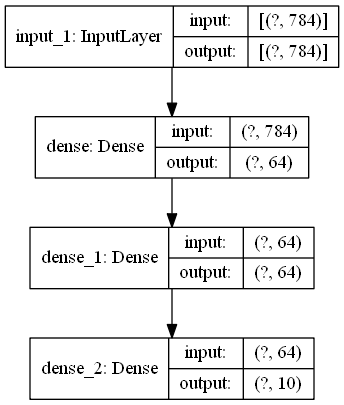

In [8]:
keras.utils.plot_model(model, 'my_first_model.png', show_shapes = True)

In [9]:
# connection arrows are replaced by call operation ( in code above)

In [10]:
## train, evaluate and inference

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# reshape into vectors and scale (since light intensities 1 byte = 255, so values btw 0-1)
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

model.compile(loss= keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             optimizer= keras.optimizers.RMSprop(),
              metrics = ['accuracy'])

history = model.fit(x_train, y_train,
                   epochs = 5,
                   batch_size= 64,
                   validation_split=0.2) # in HandsOn ML validation_data = (X_valid, y_valid)

model.evaluate(x_test, y_test, verbose = 2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 4s 84us/sample - loss: 0.3269 - accuracy: 0.9082 - val_loss: 0.1709 - val_accuracy: 0.9494
Epoch 2/5
48000/48000 [==============================] - 3s 57us/sample - loss: 0.1541 - accuracy: 0.9540 - val_loss: 0.1378 - val_accuracy: 0.9597
Epoch 3/5
48000/48000 [==============================] - 3s 66us/sample - loss: 0.1167 - accuracy: 0.9651 - val_loss: 0.1258 - val_accuracy: 0.9640
Epoch 4/5
48000/48000 [==============================] - 3s 67us/sample - loss: 0.0942 - accuracy: 0.9724 - val_loss: 0.1096 - val_accuracy: 0.9670
Epoch 5/5
48000/48000 [==============================] - 3s 68us/sample - loss: 0.0783 - accuracy: 0.9766 - val_loss: 0.1070 - val_accuracy: 0.9693
10000/10000 - 0s - loss: 0.0931 - accuracy: 0.9720


[0.09312547360928729, 0.972]

In [11]:
## Save and serialize

model.save("path_to_my_model")

del model

# recreate
model = keras.models.load_model('path_to_my_model')



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: path_to_my_model\assets


In [12]:
## All Models are callable just like layers

encoder_input = keras.Input(shape=(28, 28, 1), name='original_img')
x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')
encoder.summary()

decoder_input = keras.Input(shape=(16,), name='encoded_img')
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation='relu')(x)

decoder = keras.Model(decoder_input, decoder_output, name='decoder')
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name='img')
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name='autoencoder')
autoencoder.summary()

# model can be nested within other models. common use case is ensembling


Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

In [ ]:
## Manipulate complex graph topologies

multiple Inputs and Outputs

'Ranking custom issue tickets by prority and routing to correct department'
the title of the ticket (text input),
the text body of the ticket (text input), and
any tags added by the user (categorical input)
This model will have two outputs:

the priority score between 0 and 1 (scalar sigmoid output), and
the department that should handle the ticket (softmax output over the set of departments).
You can build this model in a few lines with the functional API:


In [13]:
# Functional Api Model with 3 inputs and 2 outputs


num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = keras.Input(shape=(None,), name='title')  # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name='body')  # Variable-length sequence of ints
tags_input = keras.Input(shape=(num_tags,), name='tags')  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, name='priority')(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, name='department')(x)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(inputs=[title_input, body_input, tags_input],
                    outputs=[priority_pred, department_pred])

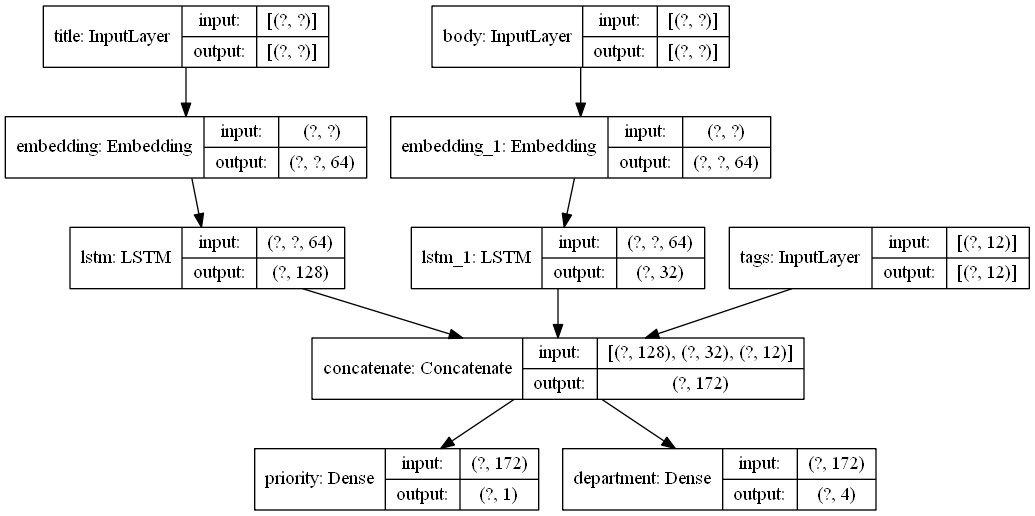

In [14]:
keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

In [15]:
# different loss function with diff. weights

model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss=[keras.losses.BinaryCrossentropy(from_logits=True),
                    keras.losses.CategoricalCrossentropy(from_logits=True)],
              loss_weights=[1., 0.2])

In [20]:
# train with dummy data

# Dummy input data
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype('float32')

# Dummy target data
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))

model.fit({'title': title_data, 'body': body_data, 'tags': tags_data},
          {'priority': priority_targets, 'department': dept_targets},
          epochs=2,
          batch_size=32)


Train on 1280 samples
Epoch 1/2
1280/1280 [==============================] - 2s 2ms/sample - loss: 1.2806 - priority_loss: 0.7001 - department_loss: 2.9026
Epoch 2/2
1280/1280 [==============================] - 2s 2ms/sample - loss: 1.2740 - priority_loss: 0.6983 - department_loss: 2.8786


### A toy ResNet model

In addition to models with multiple inputs and outputs, the functional API makes it easy to manipulate non-linear connectivity topologies—these are models with layers that are not connected sequentially. Something the **Sequential** API can not handle.

A common use case for this is residual connections. Let's build a toy ResNet model for CIFAR10 to demonstrate this:

In [21]:
inputs = keras.Input(shape=(32, 32, 3), name='img')
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(64, 3, activation='relu')(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_1_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_2_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation='relu')(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name='toy_resnet')
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 28, 28, 64)   18496       conv2d_4[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 9, 9, 64)     0           conv2d_5[0][0]                   
_________________________________________________________________________________________

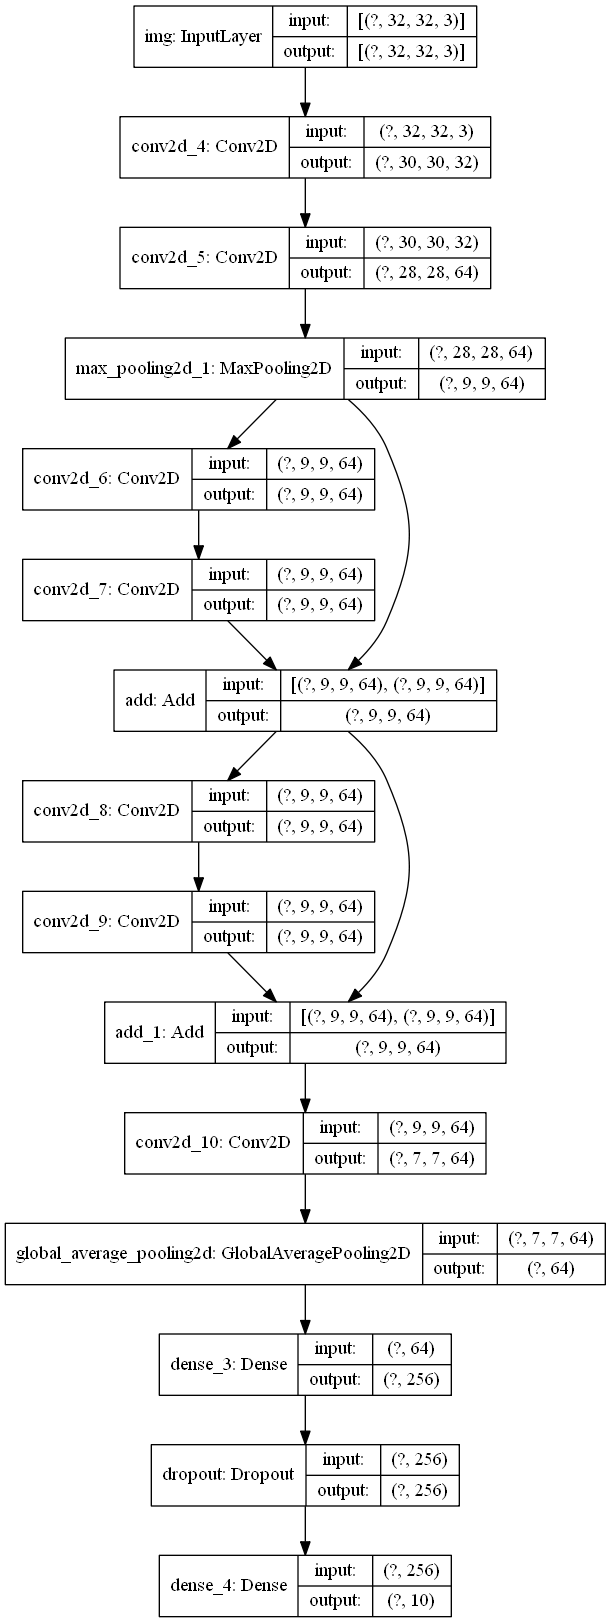

In [23]:
keras.utils.plot_model(model, "mini_resnet.png", show_shapes = True)

In [24]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

model.fit(x_train, y_train,
          batch_size=64,
          epochs=1,
          validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
40000/40000 [==============================] - 151s 4ms/sample - loss: 1.9015 - acc: 0.2767 - val_loss: 1.5535 - val_acc: 0.4148
